In [12]:
# Cell 1: Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

import sys
sys.path.append('../src')
from preprocess import clean_text
from feature_engineering import add_sentiment_score, tfidf_vectorize, combine_features



In [13]:
# Cell 2: Load Data
df_true = pd.read_csv('../data/True.csv')
df_fake = pd.read_csv('../data/Fake.csv')
df_true['label'] = 1
df_fake['label'] = 0
df = pd.concat([df_true, df_fake], ignore_index=True)



In [14]:
# Cell 3: Preprocess and Feature Engineering
df['text_clean'] = df['text'].apply(clean_text)
df = add_sentiment_score(df, text_column='text_clean')
X_tfidf, vectorizer = tfidf_vectorize(df, text_column='text_clean')
X = combine_features(X_tfidf, df['sentiment'])
y = df['label']



In [15]:
# Cell 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [16]:
# Cell 5: Train Models
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
nb = MultinomialNB()
nb.fit(X_train, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [17]:

# Cell 6: Evaluate Models
y_pred_logreg = logreg.predict(X_test)
y_pred_nb = nb.predict(X_test)
acc_logreg = accuracy_score(y_test, y_pred_logreg)
acc_nb = accuracy_score(y_test, y_pred_nb)
print(f"Logistic Regression Accuracy: {acc_logreg:.2f}")
print(f"Naive Bayes Accuracy: {acc_nb:.2f}")


Logistic Regression Accuracy: 0.00
Naive Bayes Accuracy: 0.00


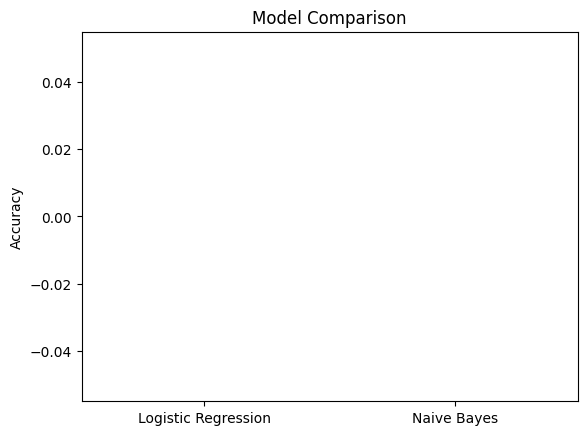

In [18]:

# Cell 7: Plot Accuracies
plt.bar(['Logistic Regression', 'Naive Bayes'], [acc_logreg, acc_nb])
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()


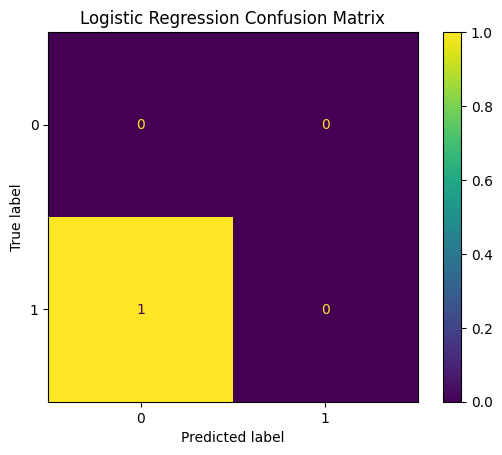

In [19]:

# Cell 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()



C:\Users\arnav\OneDrive\ドキュメント\Thapar\VS Code\Practice\Fake_News_Detection\venv\Lib\site-packages\sklearn\metrics\_ranking.py:1192: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


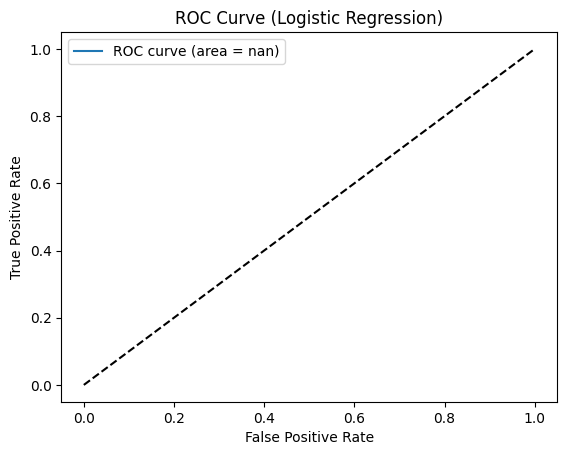

In [20]:
# Cell 9: ROC Curve
y_proba = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression)')
plt.legend()
plt.show()


In [21]:

# Cell 10: Save Model and Vectorizer
with open('../app/model.pkl', 'wb') as f:
    pickle.dump(logreg, f)
with open('../app/vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)